Table 1: Flight availability.
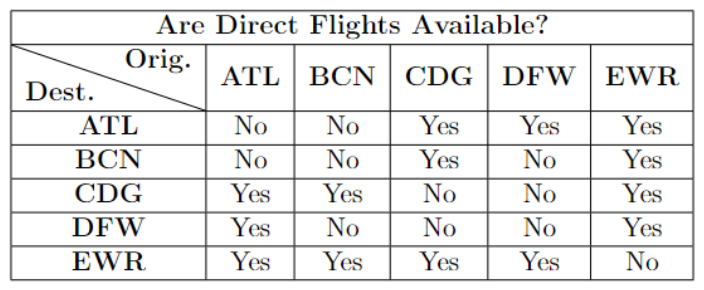

Let's say you want to fly from ATL to BCN. What is the minimum number of flights it would take?

A layover is the number of stops between flights. If you have a sequence of $n$ flights, there will be $n-1$ layovers between them. How many one-layover flights are there from ATL to BCN? From ATL to CDG? From ATL back to ATL?

Let us write a matrix to represent the table above. An entry of $1$ means there is a flight available, while an entry of $0$ means none are available.

In [ ]:
flight_matrix = [
    [0, 0, 1, 1, 1],
    [0, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [1, 1, 1, 1, 0]
]

flight_labels = ["ATL", "BCN", "CDG", "DFW", "EWR"]

We should write a function to help us display our matrix nicely.

In [ ]:
def print_square_matrix_with_labels(matrix, labels):
    # check if matrix is square
    if len(matrix) != len(matrix[0]):
        print("Matrix is not square.")
        return
    
    # check if the number of labels matches the dimension of the matrix
    if len(matrix) != len(labels):
        print("Matrix and labels are different sizes.")
        return
    
    # number of label entries
    dimension = len(matrix)
    
    # for proper spacing
    max_label_length = 0
    for label in labels:
        max_label_length = max(max_label_length, len(label))
    max_entry_length = max_label_length
    for row in matrix:
        for entry in row:
            max_entry_length = max(max_label_length, len(str(entry)))
    
    # print the first line
    f_line = " " * (max_label_length + 2)
    for label in labels:
        f_line += " " * (max_entry_length - len(label)) + label + "  "
    print(f_line)
    
    # print the other lines
    for idx in range(dimension):
        label = labels[idx]
        line = label + " " * (max_label_length - len(label)) + " ["
        row = matrix[idx]
        for entry in row:
            line += " " * (max_entry_length - len(str(entry))) + str(entry) + ", "
        line = line[:-2] + "]"
        print(line)

Running this print function displays our matrix below.

In [ ]:
print_square_matrix_with_labels(flight_matrix, flight_labels)

Since it is a square matrix, we can take exponentials of it. Let us write a function first to multiply matrices ...

In [ ]:
def matrix_multiplication(matrix1, matrix2):
    # check if matrix multiplication is permitted
    if len(matrix1[0]) != len(matrix2):
        print("These matrices cannot be multiplied.")
        return None
    
    # number of terms we add toghether
    terms = len(matrix2)
    
    # result matrix
    product_matrix = []
    
    # compute the product
    for i in range(len(matrix2[0])):
        # row by row computation
        row = []
        for j in range(len(matrix1)):
            product = 0
            
            # calculate a specific entry in the product matrix
            for s in range(terms):
                product += matrix1[i][s] * matrix2[s][j]
            row.append(product)
        product_matrix.append(row)
    return product_matrix

... and then write a function to take exponents of matrices.

In [ ]:
def matrix_exponential(matrix, power):
    # check if we can take the power
    if not isinstance(power, int) or not power > 0:
        print("Please enter a positive integer exponent.")
        return None
    
    # the matrix we store the exponential in
    exponent_matrix = matrix
    
    # multiply once for each power
    for i in range(power - 1):
        exponent_matrix = matrix_multiplication(exponent_matrix, matrix)
    return exponent_matrix

Now let us use these functions to take powers of our flight matrix! First, take it to the second power, and use our printing function to print the matrix nicely.

In [ ]:
print_square_matrix_with_labels(matrix_exponential(flight_matrix, 2), flight_labels)

Compute how many one-layover flights there are from: 1) EWR to ATL, 2) From EWR to BCN, 3) EWR to CDG, 4) EWR to DFW, and 5) EWR back to EWR. These should exactly match the entries in the last row of the matrix.

Each entry in our squared matrix tells us the number of one-layover (two flights) trips there are between two airports. Now, let us cube the matrix.

In [ ]:
print_square_matrix_with_labels(matrix_exponential(flight_matrix, 3), flight_labels)

What does this matrix represent?